In [1]:
from __future__ import division
from __future__ import print_function

import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import utils
import BachNet
import matplotlib.pyplot as plt
import cv2
import time
import os
import h5py
import sys

%matplotlib inline

Using TensorFlow backend.


In [2]:
b_net = BachNet.BachNet()

try:
    b_net.model = load_model('saved_model/Bach/model.h5')
except IOError:
    b_net.build(15,15, 1)
    b_net.model.save('saved_model/Bach/model.h5')

In [3]:
train_path = "data/train/input/"
test_path = "data/test/input/"

path_to_original_images = "original/"
path_to_gt_images = "gt/"
hfile_path = "data/train/bach/original/sample_A_20160501.hdf"

In [4]:
originals = os.listdir(os.path.join(train_path, path_to_original_images))

number_files = len(originals)

for i, filename in enumerate(originals):
    progress = i + 1 / number_files * 100
    sys.stdout.write("\nTotal Progress: [%d%%]\n" % progress)
    
    gt_filename = filename + "_gt"
    
    image_path = os.path.join(train_path, path_to_original_images, filename)
    gt_path = os.path.join(train_path, path_to_gt_images, gt_filename)
    
    print("Now training on", filename)
    print("---------------------------")
    
    img = cv2.imread(image_path, 0)
    x = utils.prepare_input_images(img)

    gt = cv2.imread(gt_path, 0)
    y = np.zeros_like(gt)
    y[gt == 255] = 1
    y = y.flatten()

    b_net.model.fit(x, y, batch_size=1000, epochs=1)
    b_net.model.save('saved_model/Bach/model.h5')
    
    
sys.stdout.write("\nDone!")


Total Progress: [50%]
Now training on slice_1
---------------------------
Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[256,512]
	 [[Node: Variable_4/Assign = Assign[T=DT_FLOAT, _class=["loc:@Variable_4"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_4, Const_8)]]

Caused by op u'Variable_4/Assign', defined at:
  File "/home/collin/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/collin/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/collin/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/collin/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/collin/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/collin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-b2d62622082a>", line 25, in <module>
    b_net.model.fit(x, y, batch_size=1000, epochs=1)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/keras/models.py", line 863, in fit
    initial_epoch=initial_epoch)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/keras/engine/training.py", line 1413, in fit
    self._make_train_function()
  File "/home/collin/anaconda2/lib/python2.7/site-packages/keras/engine/training.py", line 937, in _make_train_function
    self.total_loss)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/keras/optimizers.py", line 222, in get_updates
    accumulators = [K.zeros(K.get_variable_shape(p), dtype=K.dtype(p)) for p in params]
  File "/home/collin/anaconda2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 603, in zeros
    dtype, name)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 321, in variable
    v = tf.Variable(value, dtype=_convert_string_dtype(dtype), name=name)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 200, in __init__
    expected_shape=expected_shape)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 309, in _init_from_args
    validate_shape=validate_shape).op
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/state_ops.py", line 271, in assign
    validate_shape=validate_shape)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_state_ops.py", line 45, in assign
    use_locking=use_locking, name=name)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/collin/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[256,512]
	 [[Node: Variable_4/Assign = Assign[T=DT_FLOAT, _class=["loc:@Variable_4"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_4, Const_8)]]


In [19]:
img = cv2.imread('data/train/slice_0/O', 0)
x = utils.prepare_input_images(img)

gt = cv2.imread('data/train/slice_0/G', 0)
y = np.zeros_like(gt)
y[gt == 255] = 1
y = y.flatten()

In [20]:
b_probs = b_net.boundary_probabilities(img, batch_size=3000, verbose=1)

Starting boundary predictions
1562500/1562500 [==============================] - 3s     


In [21]:
b = b_probs * 255

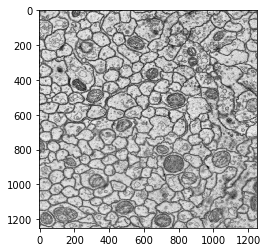

In [22]:
plt.imshow(img, cmap='gray')

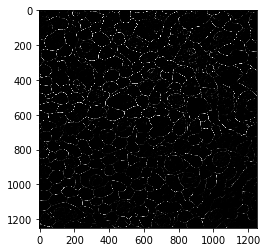

In [23]:
plt.imshow(b, cmap='gray')

In [44]:
os.system("gmic -v -1 data/test/slice_100/G -channels 1 -threshold 10% -negative -label_fg 0,0 -o -.asc | tail -n +2 | awk '{ for (i = 1; i<=NF; i++) {x[$i] += i; y[$i] += NR; n[$i]++; } } END { for (v in x) print x[v]/n[v],y[v]/n[v] }' > data/test/slice_100/seeds.txt")

0

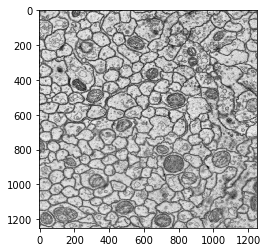

In [4]:
plt.imshow(img, cmap='gray')

In [ ]:
path = "/home/collin/Documents/Cremi data/full"
destination = "/home/collin/Documents/Cremi data/small"

for i, filename in enumerate(os.listdir(path)):
    img = cv2.imread(os.path.join(path, filename), 0)
    small_image = utils.crop_2d(img, (0,0), 100, 100)
    plt.imsave(os.path.join(destination, filename), small_image, cmap='gray')

In [47]:
train_test_split = 0.8
shuffle = True

In [20]:
with h5py.File(hfile_path, 'r') as hdf_file:
    raw = hdf_file['volumes']['raw'][:]
    labels = hdf_file['volumes']['labels']['neuron_ids'][:]

In [50]:
for i, (raw_image, segmentation) in enumerate(zip(raw, gt_segmentations)):
    
    if i / raw.shape[0] < train_test_split:
        original_path = os.path.join(train_path, path_to_original_images)
        gt_path = os.path.join(train_path, path_to_gt_images)
    else:
        original_path = os.path.join(test_path, path_to_original_images)
        gt_path = os.path.join(test_path, path_to_gt_images)
        
    original_name = "slice_{}".format(i)
    gt_name = "slice_{}_gt".format(i)

    plt.imsave(os.path.join(original_path, original_name), raw_image, cmap='gray')
    plt.imsave(os.path.join(gt_path, gt_name), segmentation, cmap='gray')

In [32]:
def ids_to_segmentation(neuron_ids):
    """
    Given a numpy array containing the neuron ids for a CREMI neural segmentation image,
    this function returns the ground segmentation image where a segmentation boundary
    is a white pixel and everything else is a black pixel.

    Args:
        neuron_ids: A numpy array containing the neuron ids of a segmentation image.

    Returns:
        A numpy array of ground truth segmentations.

    """

    edges_right = neuron_ids[:, :-1].ravel() != neuron_ids[:, 1:].ravel()
    edges_down = neuron_ids[:-1].ravel() != neuron_ids[1:].ravel()

    edges_down = edges_down.reshape((neuron_ids.shape[0] - 1, neuron_ids.shape[1]))
    edges_right = edges_right.reshape((neuron_ids.shape[0], neuron_ids.shape[1] - 1))

    segmentations = np.zeros_like(neuron_ids)

    for index, x in np.ndenumerate(edges_down):
        if x:
            segmentations[index] = 255
            segmentations[index[0] + 1][index[1]] = 255

    for index, x in np.ndenumerate(edges_right):
        if x:
            segmentations[index] = 255
            segmentations[index[0]][index[1] + 1] = 255

    return segmentations

In [34]:
labels.shape

(125, 1250, 1250)

In [43]:
# Initialize segmentation image placeholder.
gt_segmentations = np.zeros_like(labels)

for index, x in enumerate(labels):
    progress = index/len(labels) * 100
    sys.stdout.write("\rProgress\t[%d%%]" % progress)
    sys.stdout.flush()
    gt_segmentations[index] = ids_to_segmentation(x)

Progress	[99%]